<a href="https://colab.research.google.com/github/longhtt/Seattle-Weather/blob/main/Copy_of_DATA_3320_Seattle_St_Louis_Data_Preparation_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Provide a brief introduction to the purpose of this notebook.

## Import libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

I have already obtained the data. The data are available at this [github repository](https://github.com/brian-fischer/DATA-3320/tree/main/weather) and are called `seattle_rain.csv` and `stl_rain.csv`.

Load the Seattle data set and 
Load the St. Louis data set


In [57]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/seattle_rain.csv')
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/stl_rain.csv')


## Explore the contents of the data sets

In [58]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [59]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [60]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [61]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


In [62]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


In [63]:
df_stlouis.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

In [64]:
df_stlouis['STATION'].unique()

array(['US1MOSS0027', 'US1MOSL0019', 'US1MOSL0018', 'US1MOSL0039',
       'US1MOSLC010', 'US1ILSC0009', 'US1MOSL0050', 'US1MOJF0018',
       'US1MOSL0070', 'US1MOSL0092', 'US1MOSL0079', 'US1MOSL0056',
       'US1MOSL0055', 'US1MOSL0077', 'US1ILMD0047', 'US1MOSL0054',
       'US1MOSL0076', 'US1MOSL0074', 'US1MOSLC007', 'US1MOFSA189',
       'US1MOSL0027', 'US1MOSL0049', 'US1MOSL0004', 'USC00237397',
       'USC00237452', 'USC00237398', 'US1ILSC0018', 'US1MOSS0034',
       'USW00003960', 'US1MOSL0083', 'US1ILMO0006', 'US1MOSL0081',
       'US1MOJF0025', 'US1MOSS0051', 'US1ILMD0010', 'US1MOSL0024',
       'US1MOSL0045', 'US1MOSL0067', 'US1MOSL0020', 'US1ILMD0012',
       'US1MOSL0063', 'USW00013994', 'US1MOSL0062', 'US1MOSL0084'],
      dtype=object)

In [65]:
df_stlouis['STATION'].value_counts()

USW00003960    2191
USW00013994    2191
USC00237397    2189
USC00237398    2189
US1MOSLC007    2179
USC00237452    2154
US1ILMD0010    2150
US1MOSL0024    2122
US1MOJF0018    2113
US1MOSL0027    2085
US1ILMD0012    1954
US1MOSL0049    1938
US1MOSL0018    1923
US1MOSL0004    1868
US1MOSL0050    1810
US1MOSL0055    1792
US1MOFSA189    1776
US1MOSL0074    1674
US1MOSS0027    1663
US1MOSL0020    1544
US1MOSL0067    1473
US1ILSC0009    1399
US1MOSL0039    1354
US1MOSL0077    1339
US1MOJF0025    1124
US1MOSL0070     965
US1MOSL0063     924
US1MOSL0081     914
US1MOSL0045     849
US1MOSL0062     807
US1MOSL0083     646
US1ILSC0018     453
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1MOSL0054     248
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1MOSL0056     198
US1ILMO0006     162
US1MOSS0034     130
US1MOSL0019      58
Name: STATION, dtype: int64

In [66]:
df_seattle['STATION'].value_counts()

US1WAKG0225    1658
Name: STATION, dtype: int64

## Convert data types, if necessary

converting date to datetime type

In [67]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

In [68]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

Text(0, 0.5, 'Precipitation (inch)')

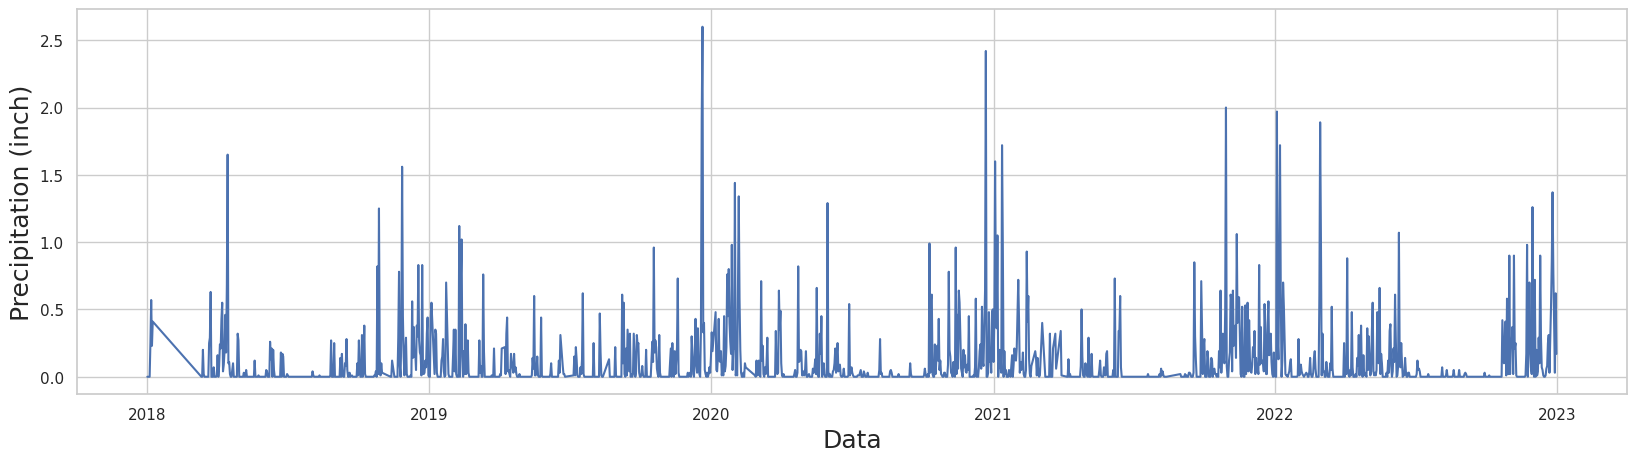

In [69]:
plt.figure(figsize = (20,5))
sns.lineplot(data = df_seattle, x = 'DATE', y = 'PRCP')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Precipitation (inch)', fontsize = 18)

Text(0, 0.5, 'Precipitation (inch)')

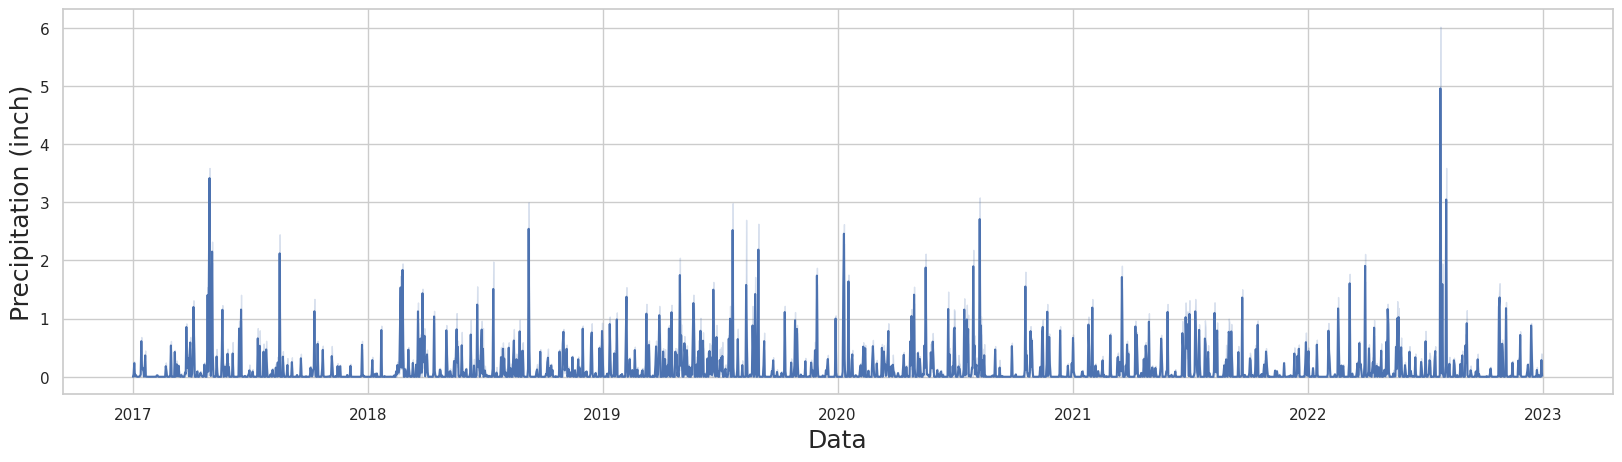

In [70]:
plt.figure(figsize = (20,5))
sns.lineplot(data = df_stlouis, x = 'DATE', y = 'PRCP')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Precipitation (inch)', fontsize = 18)


## Select relevant subsets of the data

In [71]:
df_seattle['PRCP']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.25
        ... 
1653    0.78
1654    0.40
1655    0.03
1656    0.62
1657    0.17
Name: PRCP, Length: 1658, dtype: float64

In [72]:
df_seattle.loc[:,'PRCP']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.25
        ... 
1653    0.78
1654    0.40
1655    0.03
1656    0.62
1657    0.17
Name: PRCP, Length: 1658, dtype: float64

In [73]:
df_seattle.iloc[:, 5]

0       0.00
1       0.00
2       0.00
3       0.00
4       0.25
        ... 
1653    0.78
1654    0.40
1655    0.03
1656    0.62
1657    0.17
Name: PRCP, Length: 1658, dtype: float64

In [74]:
df_seattle[['STATION', 'DATE', 'PRCP']]

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62



implicit

In [75]:
df_seattle.iloc[:3]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.0,NaN,NaN,NaN,NaN


explits

In [76]:
df_seattle.loc[:2]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.0,NaN,NaN,NaN,NaN


last n rows 

In [77]:
df_seattle.tail()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
1653,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-27,NaN,NaN,0.78,NaN,NaN,NaN,NaN
1654,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-28,NaN,NaN,0.40,NaN,NaN,NaN,NaN
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,NaN,NaN,0.03,NaN,NaN,NaN,NaN
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,NaN,NaN,0.62,NaN,NaN,NaN,NaN
1657,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-31,NaN,NaN,0.17,NaN,NaN,NaN,NaN


select rows using logical indexing

In [78]:
df_seattle['PRCP'] > 0

0       False
1       False
2       False
3       False
4        True
        ...  
1653     True
1654     True
1655     True
1656     True
1657     True
Name: PRCP, Length: 1658, dtype: bool

In [79]:
df_seattle[df_seattle['PRCP'] > 0]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-07,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-08,NaN,NaN,0.41,NaN,NaN,NaN,NaN
10,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-14,NaN,NaN,0.20,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1653,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-27,NaN,NaN,0.78,NaN,NaN,NaN,NaN
1654,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-28,NaN,NaN,0.40,NaN,NaN,NaN,NaN
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,NaN,NaN,0.03,NaN,NaN,NaN,NaN
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,NaN,NaN,0.62,NaN,NaN,NaN,NaN


In [80]:
df_stlouis

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...
54569,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-08,NaN,NaN,0.00,NaN,NaN
54570,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-13,NaN,NaN,0.00,0.0,NaN
54571,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-14,NaN,NaN,0.89,NaN,NaN
54572,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-15,NaN,NaN,0.36,NaN,NaN


only show 2018 and after in stl

In [81]:
df_stlouis = df_stlouis[df_stlouis['DATE'] >= '2018-01-01']
df_stlouis

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
241,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-05,NaN,NaN,0.00,0.2,1.0
242,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-08,NaN,NaN,0.24,NaN,NaN
243,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-10,NaN,NaN,0.00,NaN,NaN
244,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-11,NaN,NaN,0.02,NaN,NaN
245,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-15,NaN,NaN,0.05,0.5,NaN
...,...,...,...,...,...,...,...,...
54569,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-08,NaN,NaN,0.00,NaN,NaN
54570,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-13,NaN,NaN,0.00,0.0,NaN
54571,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-14,NaN,NaN,0.89,NaN,NaN
54572,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-15,NaN,NaN,0.36,NaN,NaN


In [82]:
df_stlouis[df_stlouis['STATION'] == 'US1MOSS0027']

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
241,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-05,NaN,NaN,0.00,0.2,1.0
242,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-08,NaN,NaN,0.24,NaN,NaN
243,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-10,NaN,NaN,0.00,NaN,NaN
244,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-11,NaN,NaN,0.02,NaN,NaN
245,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-15,NaN,NaN,0.05,0.5,NaN
...,...,...,...,...,...,...,...,...
1658,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2022-12-26,NaN,NaN,0.01,0.3,NaN
1659,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2022-12-27,NaN,NaN,0.00,NaN,NaN
1660,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2022-12-28,NaN,NaN,0.00,0.0,NaN
1661,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2022-12-29,NaN,NaN,0.00,0.0,NaN


## Identify and deal with missing values

pick 

In [83]:
df_seattle[['STATION', 'DATE', 'PRCP']]

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62


In [84]:
df_stlouis[['STATION', 'DATE', 'PRCP']]

,STATION,DATE,PRCP
241,US1MOSS0027,2018-01-05,0.00
242,US1MOSS0027,2018-01-08,0.24
243,US1MOSS0027,2018-01-10,0.00
244,US1MOSS0027,2018-01-11,0.02
245,US1MOSS0027,2018-01-15,0.05
...,...,...,...
54569,US1MOSL0084,2022-12-08,0.00
54570,US1MOSL0084,2022-12-13,0.00
54571,US1MOSL0084,2022-12-14,0.89
54572,US1MOSL0084,2022-12-15,0.36


over 5 years ther should be  5*365 + 1 = 1826

In [85]:
df_seattle.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1635
MDPR       1635
PRCP         22
SNOW       1305
SNWD       1592
WESD       1643
WESF       1630
dtype: int64

In [86]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


<Axes: >

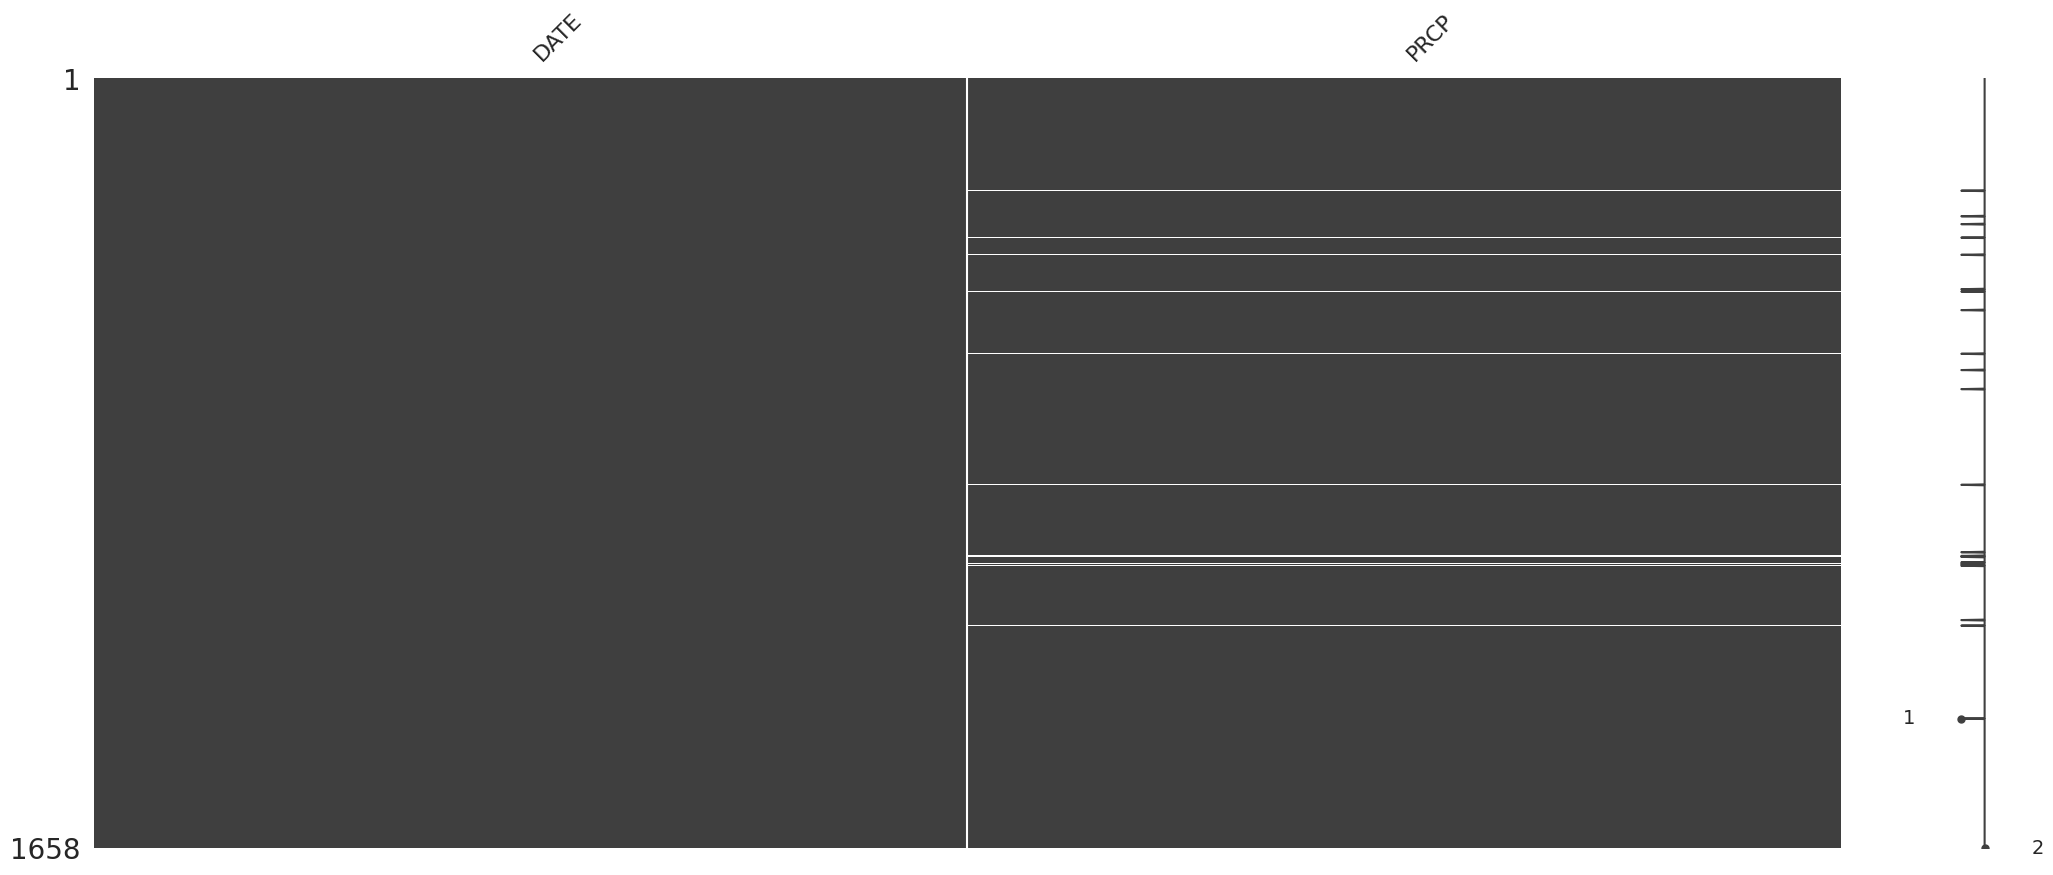

In [87]:
msno.matrix(df_seattle[['DATE', 'PRCP']])

## Join data frames keeping `DATE` and `PRCP` columns

In [88]:
df_stlouis_temp = df_stlouis[df_stlouis['STATION'] == 'USW00013994'] ## stl df with only one station 
df_weather = df_stlouis_temp[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on = 'DATE', how = 'left')
df_weather ## x = stl, y = seattle


,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.00,0.00
4,2018-01-05,0.00,0.25
...,...,...,...
1821,2022-12-27,0.00,0.78
1822,2022-12-28,0.00,0.40
1823,2022-12-29,0.00,0.03
1824,2022-12-30,0.31,0.62


## Create a tidy data frame with columns for city and precipitation

In [89]:
df_tidy = pd.melt(df_weather, id_vars = 'DATE', var_name='CITY', value_name='PRCP')
df_tidy

,DATE,CITY,PRCP
0,2018-01-01,PRCP_x,0.00
1,2018-01-02,PRCP_x,0.00
2,2018-01-03,PRCP_x,0.00
3,2018-01-04,PRCP_x,0.00
4,2018-01-05,PRCP_x,0.00
...,...,...,...
3647,2022-12-27,PRCP_y,0.78
3648,2022-12-28,PRCP_y,0.40
3649,2022-12-29,PRCP_y,0.03
3650,2022-12-30,PRCP_y,0.62


### Rename columns or values to follow best practices

In [90]:
df_tidy.loc[df_tidy['CITY'] == 'PRCP_x', 'CITY'] = 'STL'
df_tidy.loc[df_tidy['CITY'] == 'PRCP_y', 'CITY'] = 'Seattle'
df_tidy

,DATE,CITY,PRCP
0,2018-01-01,STL,0.00
1,2018-01-02,STL,0.00
2,2018-01-03,STL,0.00
3,2018-01-04,STL,0.00
4,2018-01-05,STL,0.00
...,...,...,...
3647,2022-12-27,Seattle,0.78
3648,2022-12-28,Seattle,0.40
3649,2022-12-29,Seattle,0.03
3650,2022-12-30,Seattle,0.62


In [91]:
df_tidy = df_tidy.rename(columns={'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'})
df_tidy

,date,city,precipitation
0,2018-01-01,STL,0.00
1,2018-01-02,STL,0.00
2,2018-01-03,STL,0.00
3,2018-01-04,STL,0.00
4,2018-01-05,STL,0.00
...,...,...,...
3647,2022-12-27,Seattle,0.78
3648,2022-12-28,Seattle,0.40
3649,2022-12-29,Seattle,0.03
3650,2022-12-30,Seattle,0.62


## dealing with missing data

In [92]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3462 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


<Axes: >

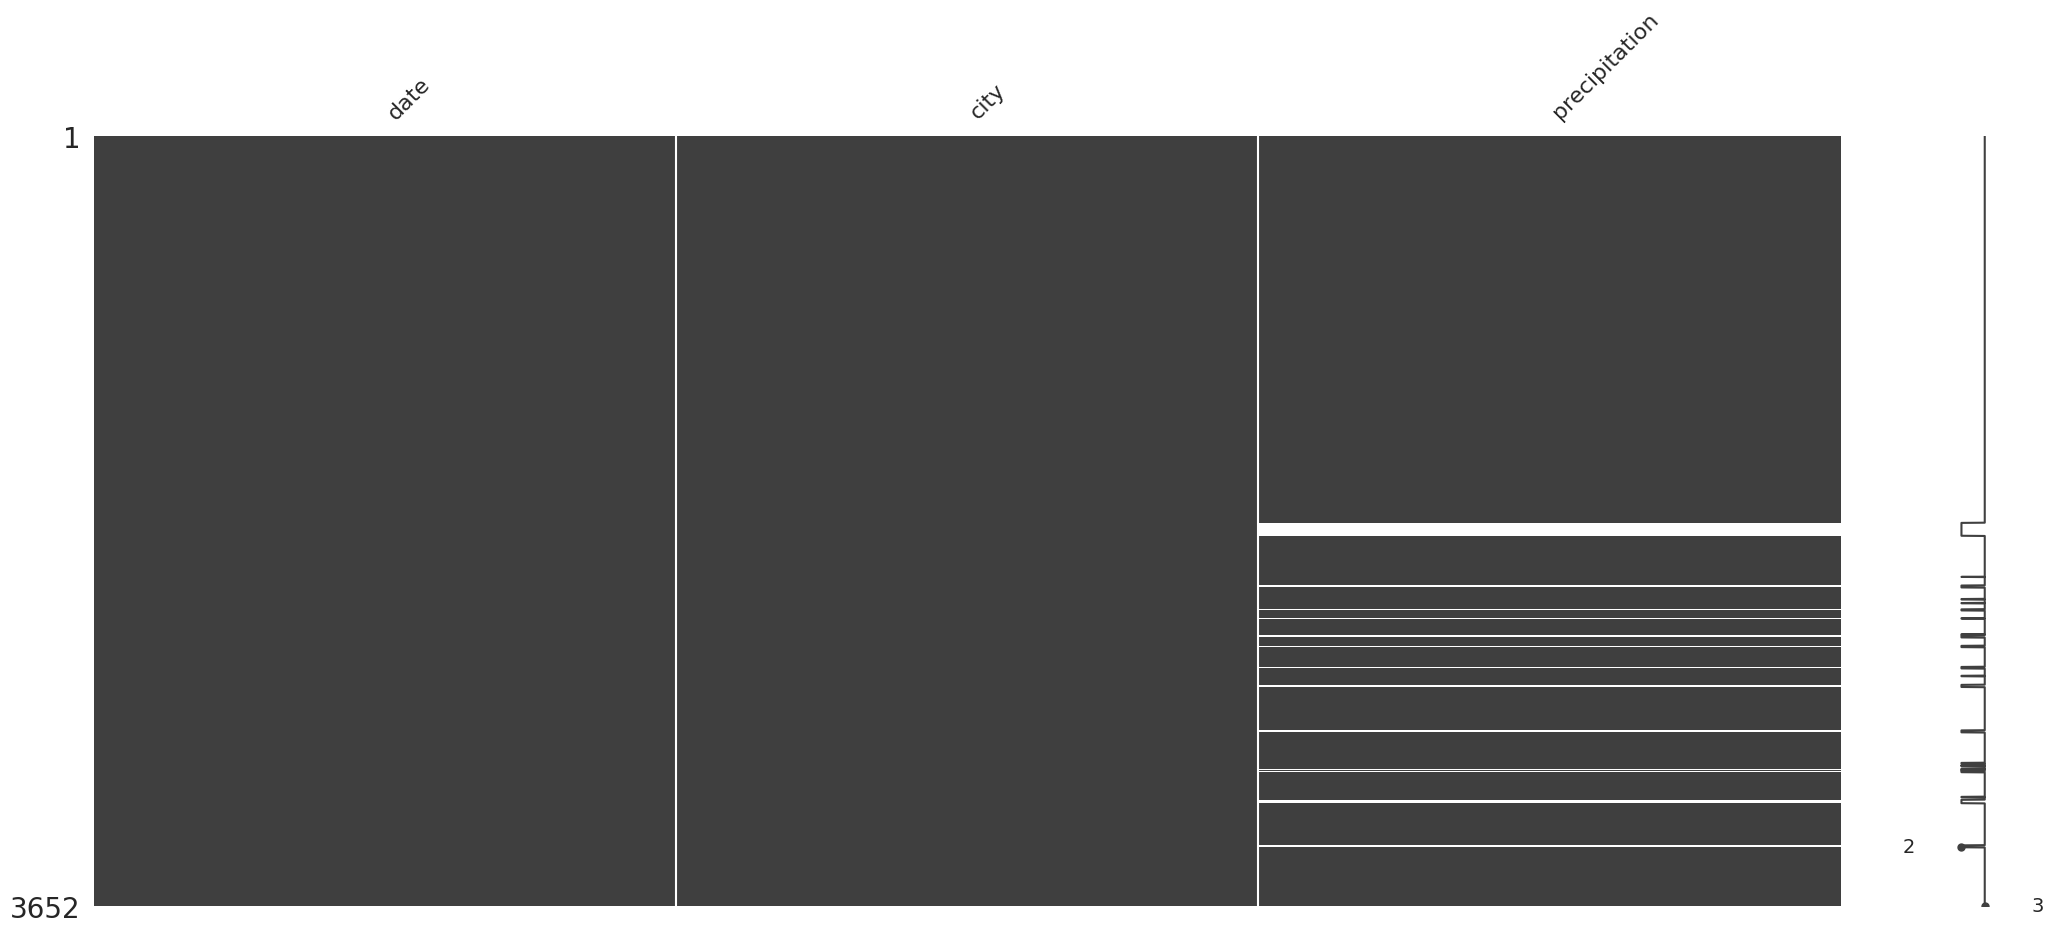

In [93]:
msno.matrix(df_tidy)

In [94]:
df_tidy['day_of_year'] = pd.DatetimeIndex(df_tidy['date']).day_of_year
df_tidy

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.00,1
1,2018-01-02,STL,0.00,2
2,2018-01-03,STL,0.00,3
3,2018-01-04,STL,0.00,4
4,2018-01-05,STL,0.00,5
...,...,...,...,...
3647,2022-12-27,Seattle,0.78,361
3648,2022-12-28,Seattle,0.40,362
3649,2022-12-29,Seattle,0.03,363
3650,2022-12-30,Seattle,0.62,364


In [95]:
df_tidy[df_tidy['precipitation'].isna()]

,date,city,precipitation,day_of_year
1834,2018-01-09,Seattle,NaN,9
1835,2018-01-10,Seattle,NaN,10
1836,2018-01-11,Seattle,NaN,11
1837,2018-01-12,Seattle,NaN,12
1838,2018-01-13,Seattle,NaN,13
...,...,...,...,...
3368,2022-03-23,Seattle,NaN,82
3369,2022-03-24,Seattle,NaN,83
3370,2022-03-25,Seattle,NaN,84
3371,2022-03-26,Seattle,NaN,85


In [96]:
indices = np.where(df_tidy['precipitation'].isna()==True)[0]
indices

array([1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844,
       1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855,
       1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866,
       1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877,
       1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131, 2132, 2133,
       2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196, 2197, 2214,
       2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287, 2288, 2362,
       2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377,
       2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518, 2519, 2520,
       2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603, 2604, 2605,
       2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974, 2975, 2983,
       2984, 2986, 2987, 2988, 3000, 3001, 3004, 30

In [97]:
mean_day_precipitation = df_tidy.loc[df_tidy['city'] == 'Seattle', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()
mean_day_precipitation

,precipitation
day_of_year,
1,0.052000
2,0.150000
3,0.836000
4,0.370000
5,0.246667
...,...
362,0.120000
363,0.102000
364,0.268000


In [98]:
for _, index in enumerate(indices):
  df_tidy.loc[index, 'precipitation'] = mean_day_precipitation.loc[df_tidy.loc[index, 'day_of_year']].values[0]
df_tidy

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.00,1
1,2018-01-02,STL,0.00,2
2,2018-01-03,STL,0.00,3
3,2018-01-04,STL,0.00,4
4,2018-01-05,STL,0.00,5
...,...,...,...,...
3647,2022-12-27,Seattle,0.78,361
3648,2022-12-28,Seattle,0.40,362
3649,2022-12-29,Seattle,0.03,363
3650,2022-12-30,Seattle,0.62,364


checking no missing values (should be empty)

In [99]:
df_tidy[df_tidy['precipitation'].isna() == True]

,date,city,precipitation,day_of_year


In [100]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3652 non-null   float64       
 3   day_of_year    3652 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 114.2+ KB


In [101]:
max = df_tidy.loc[df_tidy['day_of_year'] == 5, ['city','precipitation', 'date']].groupby('date').max()
max

,city,precipitation
date,,
2018-01-05,Seattle,0.250000
2019-01-05,Seattle,0.246667
2020-01-05,Seattle,0.246667
2021-01-05,Seattle,0.360000
2022-01-05,Seattle,0.130000


split the datetime object into individual day month year cols

In [102]:
df_tidy['day'] = pd.DatetimeIndex(df_tidy['date']).day
df_tidy['month'] = pd.DatetimeIndex(df_tidy['date']).month
df_tidy['year'] = pd.DatetimeIndex(df_tidy['date']).year
df_tidy

,date,city,precipitation,day_of_year,day,month,year
0,2018-01-01,STL,0.00,1,1,1,2018
1,2018-01-02,STL,0.00,2,2,1,2018
2,2018-01-03,STL,0.00,3,3,1,2018
3,2018-01-04,STL,0.00,4,4,1,2018
4,2018-01-05,STL,0.00,5,5,1,2018
...,...,...,...,...,...,...,...
3647,2022-12-27,Seattle,0.78,361,27,12,2022
3648,2022-12-28,Seattle,0.40,362,28,12,2022
3649,2022-12-29,Seattle,0.03,363,29,12,2022
3650,2022-12-30,Seattle,0.62,364,30,12,2022


In [104]:
#df_year['city'] = df_tidy['city']

## Create relevant derived variables as new columns

We may already know that we want to process the data to create new variables from the existing variables. However, we often start analyzing the data and realize that it is useful to create new variables derived from the existing variables. It is fine to return to modify this step after exploring the data further.

## Export the clean .csv file

numerical summeries 

In [105]:
df = df_tidy
df.describe()

,precipitation,day_of_year,day,month,year
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.00000
mean,0.121808,183.100219,15.727820,6.523549,2020.00000
std,0.325431,105.438580,8.800529,3.449005,1.41402
min,0.000000,1.000000,1.000000,1.000000,2018.00000
25%,0.000000,92.000000,8.000000,4.000000,2019.00000
50%,0.000000,183.000000,16.000000,7.000000,2020.00000
75%,0.100000,274.000000,23.000000,10.000000,2021.00000
max,8.640000,366.000000,31.000000,12.000000,2022.00000


In [106]:
df.groupby(by='city').describe()

precipitation                                                  \
                count      mean       std  min  25%   50%   75%   max   
city                                                                    
STL            1826.0  0.130345  0.392268  0.0  0.0  0.00  0.05  8.64   
Seattle        1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60   

        day_of_year              ... month          year                    \
              count        mean  ...   75%   max   count    mean       std   
city                             ...                                         
STL          1826.0  183.100219  ...  10.0  12.0  1826.0  2020.0  1.414214   
Seattle      1826.0  183.100219  ...  10.0  12.0  1826.0  2020.0  1.414214   

                                                 
            min     25%     50%     75%     max  
city                                             
STL      2018.0  2019.0  2020.0  2021.0  2022.0  
Seattle  2018.0  2019.0  2020.0  2021.0  2022.0  

[2 rows x 40 columns]

#plots

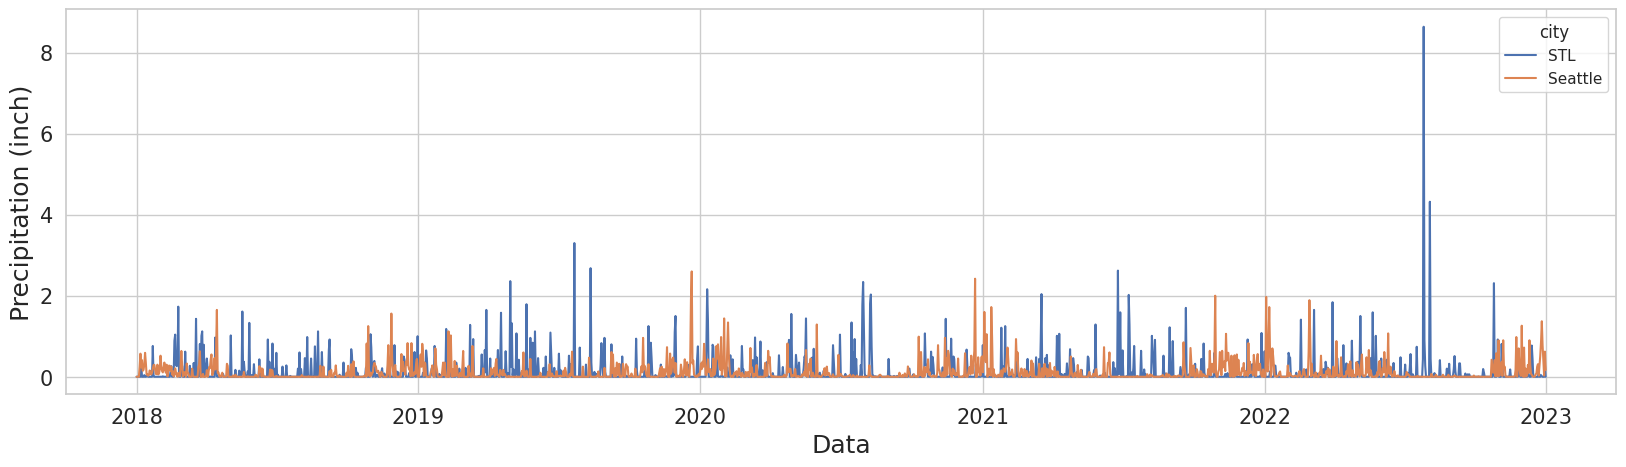

In [107]:
plt.figure(figsize = (20,5))
sns.lineplot(data = df, x = 'date', y = 'precipitation', hue='city')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Precipitation (inch)', fontsize = 18)
plt.tick_params(labelsize=15)

by month

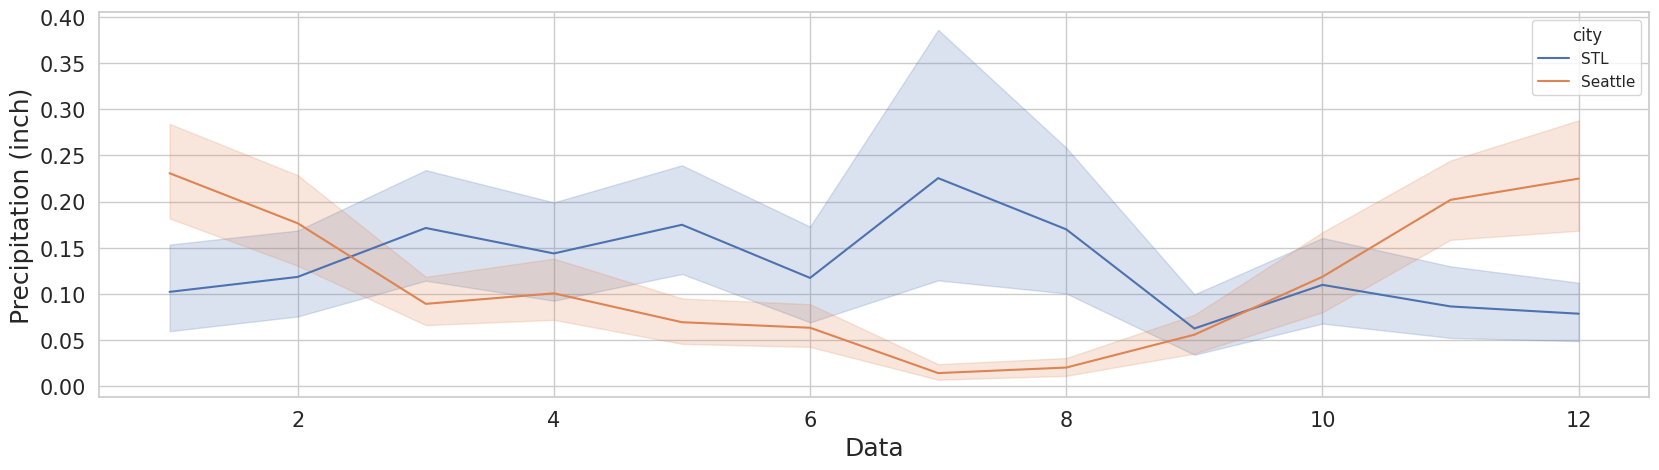

In [108]:
plt.figure(figsize = (20,5))
sns.lineplot(data = df, x = 'month', y = 'precipitation', hue='city')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Precipitation (inch)', fontsize = 18)
plt.xticks
plt.tick_params(labelsize=15)

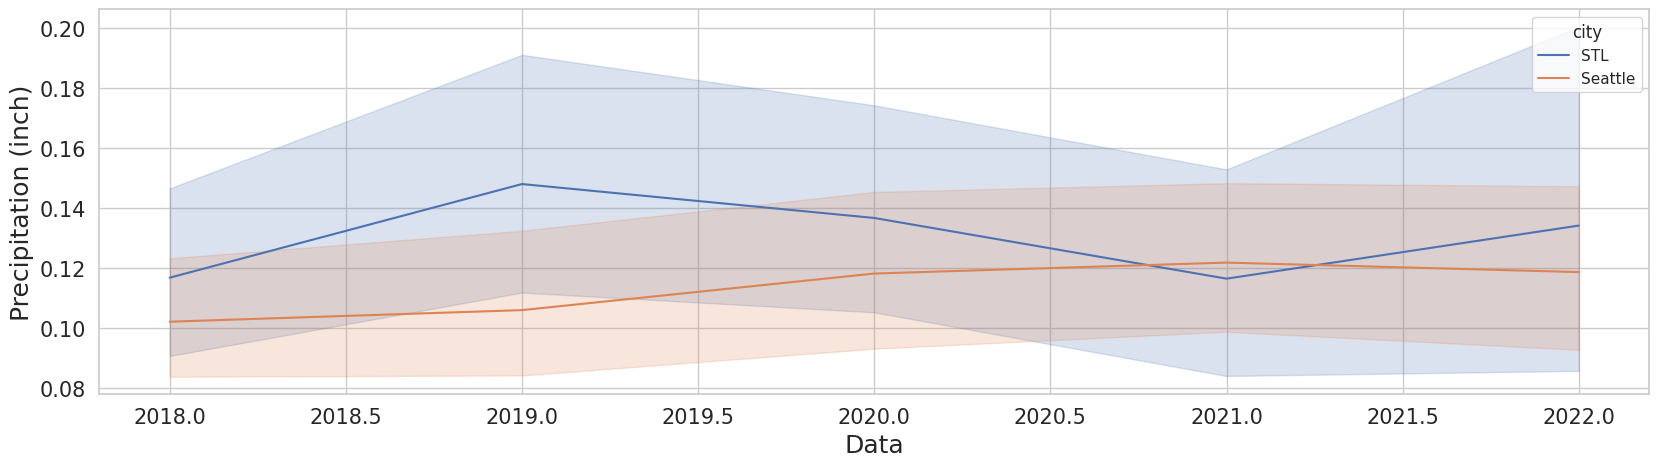

In [109]:
plt.figure(figsize = (20,5))
sns.lineplot(data = df, x = 'year', y = 'precipitation', hue='city')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Precipitation (inch)', fontsize = 18)

plt.tick_params(labelsize=15)

<Axes: xlabel='month', ylabel='precipitation'>

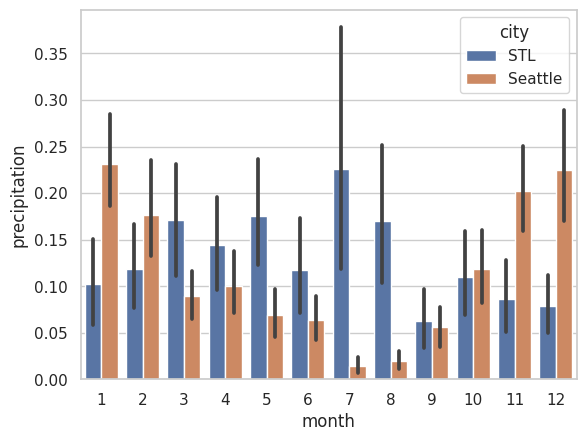

In [110]:
sns.barplot(data = df, x = 'month', y = 'precipitation', hue = 'city')

<ipython-input-115-a841172c5d58>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = 'year', y = 'precipitation', hue = 'city', ci = None)


<Axes: xlabel='year', ylabel='precipitation'>

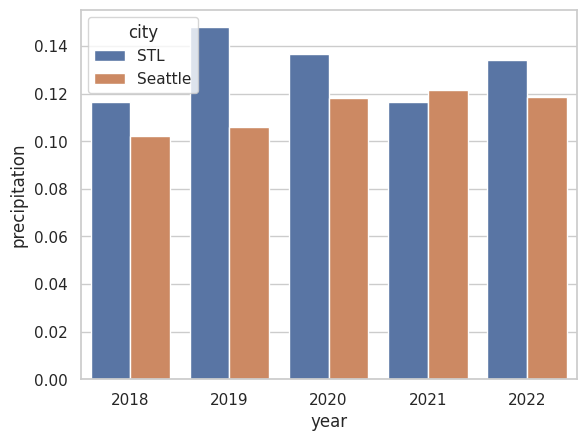

In [115]:
# a bargraph that shows the average precipitation between each city grouped by years
sns.barplot(data = df, x = 'year', y = 'precipitation', hue = 'city', ci = None)
